<a href="https://colab.research.google.com/github/Angelogallardo05/DATA602-Assignemnt8/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.


#Arrests made in NYC from 2006 to 2023

https://data.cityofnewyork.us/Public-Safety/NYPD-Arrests-Data-Historic-/8h9b-rp9u/about_data

#I want to explore the crime rate in NYC over the last few years. I hope to answer the following questions: What is the trend, improving or getting worse? Which borough is the safest? What types of crimes are being commited?

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [113]:
import pandas as pd

In [114]:
!pip install matplotlib


In [115]:
import matplotlib.pyplot as plt

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [116]:
df = pd.read_csv('/content/NYPD_Arrests_Data__Historic__20240330.csv')

In [117]:
print(df.head())

   ARREST_KEY ARREST_DATE  PD_CD                             PD_DESC  KY_CD  \
0   236791704  11/22/2021  581.0                                 NaN    NaN   
1   237354740  12/04/2021  153.0                              RAPE 3  104.0   
2   236081433  11/09/2021  681.0          CHILD, ENDANGERING WELFARE  233.0   
3    32311380  06/18/2007  511.0  CONTROLLED SUBSTANCE, POSSESSION 7  235.0   
4   192799737  01/26/2019  177.0                        SEXUAL ABUSE  116.0   

         OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  ARREST_PRECINCT  \
0              NaN  PL 2225001          M           M               28   
1             RAPE  PL 1302502          F           B               41   
2       SEX CRIMES  PL 2601001          M           Q              113   
3  DANGEROUS DRUGS  PL 2200300          M           Q               27   
4       SEX CRIMES  PL 1306503          F           M               25   

   JURISDICTION_CODE AGE_GROUP PERP_SEX       PERP_RACE  X_COORD_CD  \
0        

In [118]:
print(df.dtypes)

ARREST_KEY             int64
ARREST_DATE           object
PD_CD                float64
PD_DESC               object
KY_CD                float64
OFNS_DESC             object
LAW_CODE              object
LAW_CAT_CD            object
ARREST_BORO           object
ARREST_PRECINCT        int64
JURISDICTION_CODE    float64
AGE_GROUP             object
PERP_SEX              object
PERP_RACE             object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
Lon_Lat               object
dtype: object


Fisrst remove the last 5 columns

In [119]:
df = df.iloc[:, :-5]

Arrest_Date as date format

In [120]:
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

Remove all rows with missing values

In [121]:
df = df.dropna()

Replace the first letter of the borough in column 'ARREST_BORO' to its full name

In [122]:
boro_mapping = {
    'B': 'Bronx',
    'Q': 'Queens',
    'M': 'Manhattan',
    'K': 'Brooklyn',
    'S': 'Staten Island'
}

# Replace abbreviated names with full names
df['ARREST_BORO'] = df['ARREST_BORO'].replace(boro_mapping)

replace the letters of offense category with the full word

In [123]:
law_cat_mapping = {
    'M': 'Misdemeanor',
    'F': 'Felony',
    'V': 'Violation',
    'I': 'Infraction'
}

# Replace codes with categories
df['LAW_CAT_CD'] = df['LAW_CAT_CD'].replace(law_cat_mapping)

In [124]:
print(df.head(5))

   ARREST_KEY ARREST_DATE  PD_CD                             PD_DESC  KY_CD  \
1   237354740  2021-12-04  153.0                              RAPE 3  104.0   
2   236081433  2021-11-09  681.0          CHILD, ENDANGERING WELFARE  233.0   
3    32311380  2007-06-18  511.0  CONTROLLED SUBSTANCE, POSSESSION 7  235.0   
4   192799737  2019-01-26  177.0                        SEXUAL ABUSE  116.0   
7   236106641  2021-11-10  263.0                         ARSON 2,3,4  114.0   

         OFNS_DESC    LAW_CODE   LAW_CAT_CD ARREST_BORO  ARREST_PRECINCT  \
1             RAPE  PL 1302502       Felony       Bronx               41   
2       SEX CRIMES  PL 2601001  Misdemeanor      Queens              113   
3  DANGEROUS DRUGS  PL 2200300  Misdemeanor      Queens               27   
4       SEX CRIMES  PL 1306503       Felony   Manhattan               25   
7            ARSON  PL 1501001       Felony       Bronx               41   

   JURISDICTION_CODE AGE_GROUP PERP_SEX       PERP_RACE  
1         

# line chart showing the number of crimes for each borough over the years

From the line chart we can see that overall crime was trending downwards from 2013 up until the start of the pandemic. However, overall crime picked up after 2020. In, addition, it looks like Staten Island generally has low crime. Finally, and surpisingly,

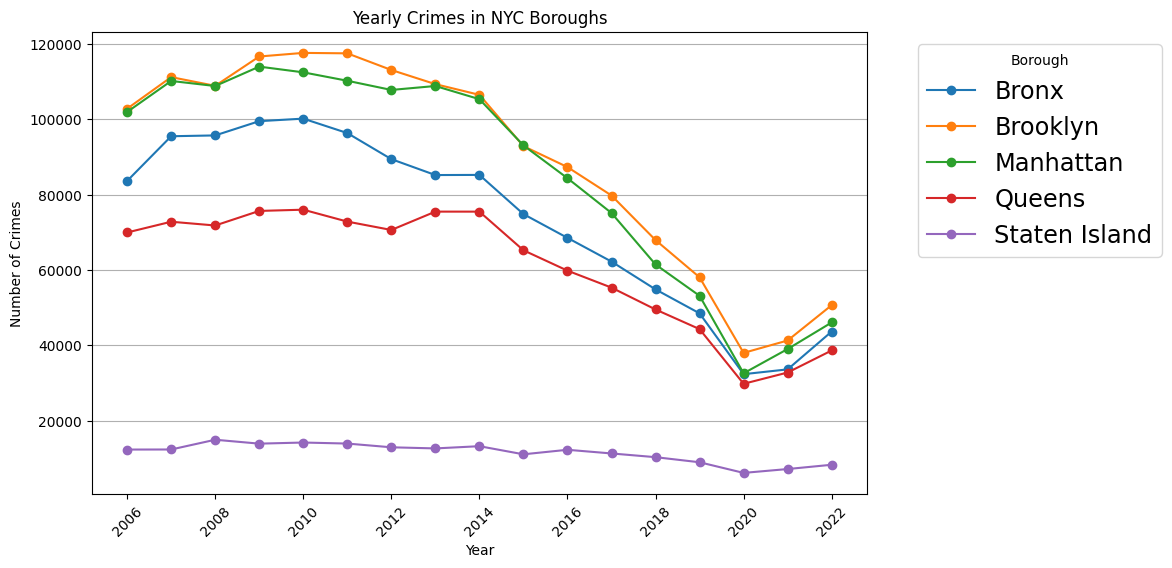

In [140]:
df['Year'] = df['ARREST_DATE'].dt.year

# Group by year and borough and count number of crimes per year
yearly_borough_crimes = df.groupby(['Year', 'ARREST_BORO']).size().unstack()

# Add title, label x axis and y axis, chart will be 1in inches wide and six inches tall
#add markers to line chart, legend upper left location, font size
yearly_borough_crimes.plot(kind='line', figsize=(10, 6), marker='o')  # line chart with markers
plt.title('Yearly Crimes in NYC Boroughs')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 'xx-large')
plt.show()

#YoY percentage change in crime, by offense. We see that Felonies had a huge increase in 2022

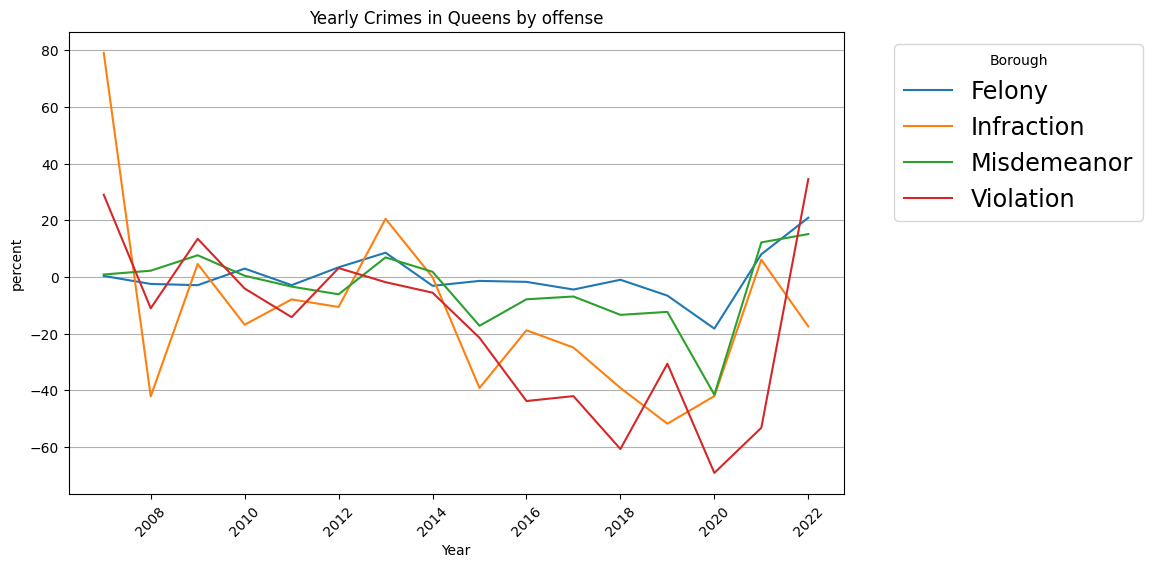

In [141]:
filtered_df = df[df['ARREST_BORO'] == 'Queens']


# Group by year and types of crimes
grouped_crimes = filtered_df.groupby(['Year', 'LAW_CAT_CD']).size().unstack()
percentage_change = grouped_crimes.pct_change() * 100


# chart 10 inches wide and 6 inches tall, add a title to the legend and move to the right
percentage_change.plot(kind='line', figsize=(10, 6))
plt.title('Yearly Crimes in Queens by offense')
plt.xlabel('Year')
plt.ylabel('percent')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 'xx-large')
plt.show()


#Count of felonies in Queens from 2006 to 2022. Here we see that felonies make up half of the offenses

<ipython-input-144-c35a98c52ee9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = filtered_df['ARREST_DATE'].dt.year


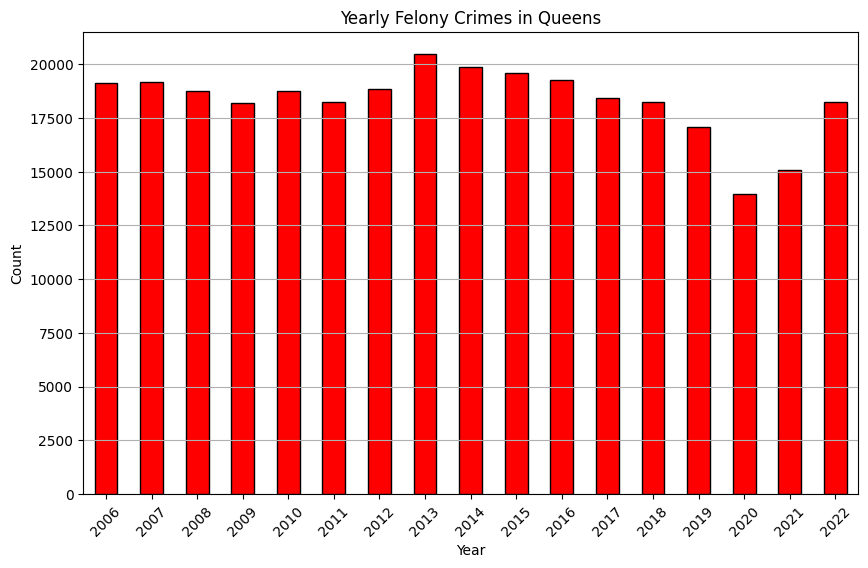

In [144]:
df2 = df[(df['ARREST_BORO'] == 'Queens') & (df['LAW_CAT_CD'] == 'Felony')]

# Extract year from 'ARREST_DATE'
df2['Year'] = filtered_df['ARREST_DATE'].dt.year


felony_crimes = df2.groupby('Year').size()
# add title and
felony_crimes.plot(kind='bar', figsize=(10, 6), color='red', edgecolor='black') # change bar color to red
plt.title('Yearly Felony Crimes in Queens')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot chart using Seaborn - Total Crime by borough

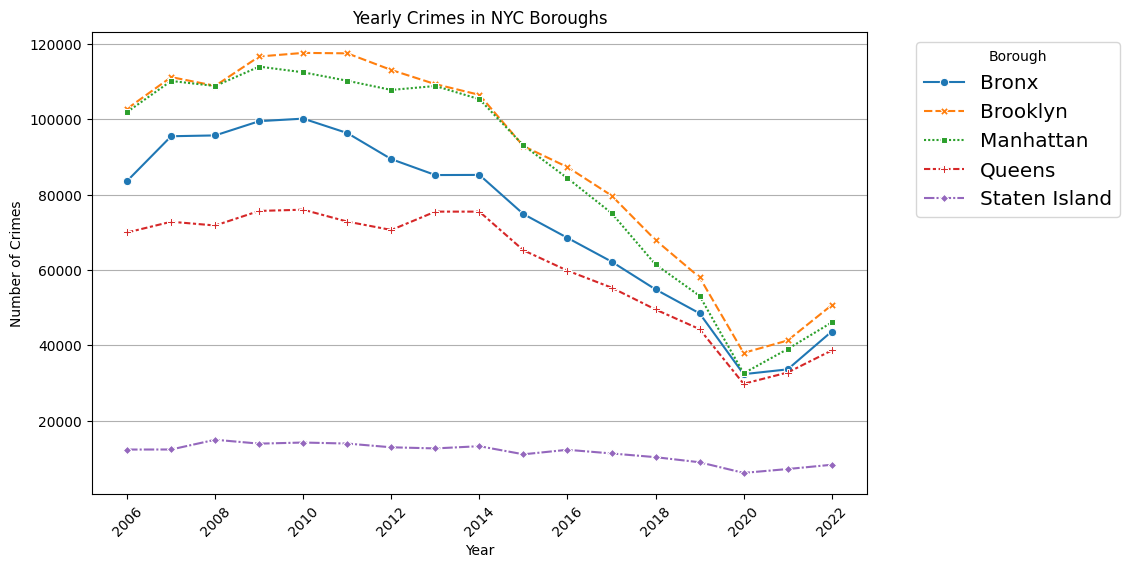

In [138]:
import seaborn as sns
yearly_borough_crimes['Year'] = yearly_borough_crimes.index

plt.figure(figsize=(10, 6)) # 10 inch wide and 6 inch tall
sns.lineplot(data=yearly_borough_crimes.drop(columns='Year'), markers=True) # add markers
# add title and lables
plt.title('Yearly Crimes in NYC Boroughs')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-large') # increase the font size
plt.show()

# Plot chart YoY percentage change in crime, by offense using Seaborn

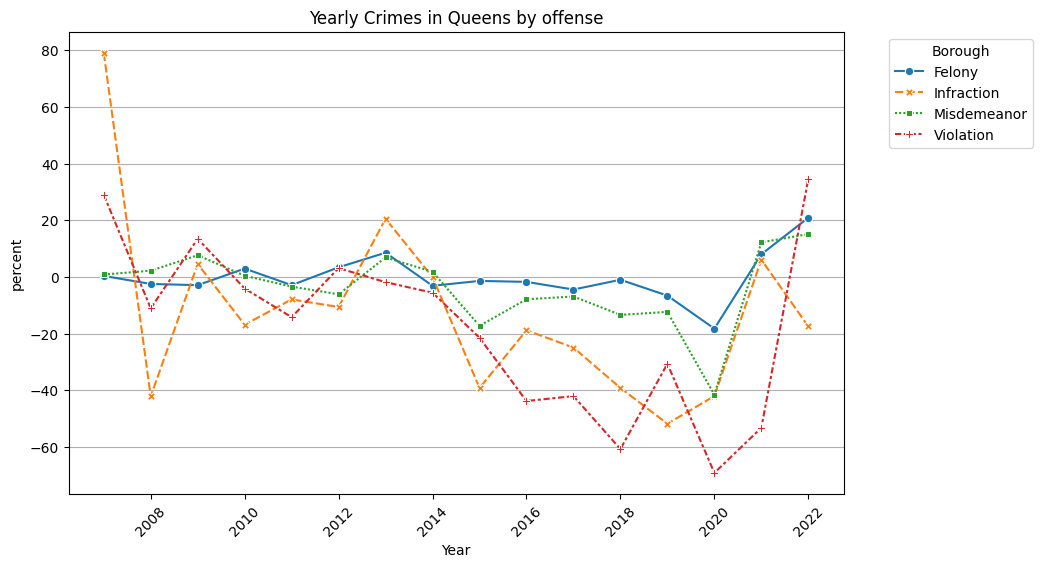

In [129]:
percentage_change['Year'] = percentage_change.index

plt.figure(figsize=(10, 6))
sns.lineplot(data=percentage_change.drop(columns='Year'), markers=True)

plt.title('Yearly Crimes in Queens by offense')
plt.xlabel('Year')
plt.ylabel('percent')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [104]:
print(felony_crimes.head(5))

Year
2006    19113
2007    19196
2008    18736
2009    18206
2010    18756
dtype: object


#Bar chart of yearly Felonies in Queens usinf SNS

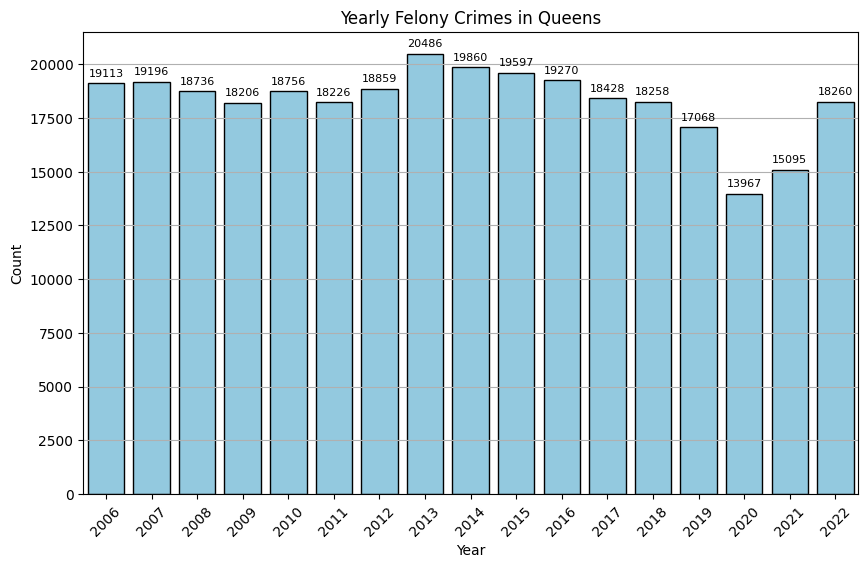

In [142]:
# add annotations using Seaborn, change bar collor , and the make the edge color black, label the axis and giv a title
felony_crimes = df2.groupby('Year').size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=felony_crimes, x='Year', y='Count', color='skyblue', edgecolor='black')
plt.title('Yearly Felony Crimes in Queens')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
#annotations
for index, row in felony_crimes.iterrows():
    plt.annotate(f"{row['Count']}",
                 xy=(index, row['Count']),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center',
                 fontsize=8)

plt.show()


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



In [ ]:
# in the line plot, using Seaborn, each line (borough) has a distinct shape to the line.

In [ ]:
# I was able to add annotations using Seaborn. But I could add annotatoins using Matlab

In [ ]:
# for Seaborn I have to type the type of plot I want to use, for example, sns.lineplot.
# it has to be a dataframe in order to create a visualization
# it is simpler to use

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

# Overall Crime in NYC decreased from 2013 to 2022. In addition, crime within each borough had a similar downtrend in crime. However, Staten Island generally had lower crime throughout the years compared to the other boroughs.

#After the pandemic felonies, the most serious crimes increased by 20% in 2022, within the borough of Queens.

# In 2022, there were about 18K felonies compared to 15K in the prior years for the borough of Queens